<a href="https://colab.research.google.com/github/djaliloua/Ali-Abdou/blob/master/classification_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [0]:
# load or read the datasets iris
iris=pd.read_csv( 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',sep=',',names=['sepal length','sepal Width','petal length','petal width','species'])

In [0]:
iris.head() # explotion of the data

,sepal length,sepal Width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
iris.groupby('species').agg(['count','mean','sum','std','var','skew']).stack()

sepal length  sepal Width  petal length  petal width
species                                                                    
Iris-setosa     count     50.000000    50.000000     50.000000    50.000000
                mean       5.006000     3.418000      1.464000     0.244000
                sum      250.300000   170.900000     73.200000    12.200000
                std        0.352490     0.381024      0.173511     0.107210
                var        0.124249     0.145180      0.030106     0.011494
                skew       0.120087     0.107053      0.071846     1.197243
Iris-versicolor count     50.000000    50.000000     50.000000    50.000000
                mean       5.936000     2.770000      4.260000     1.326000
                sum      296.800000   138.500000    213.000000    66.300000
                std        0.516171     0.313798      0.469911     0.197753
                var        0.266433     0.098469      0.220816     0.039106
                skew       0.105378    -0.362845     -0.606508    -0.031180
Iris-virginica  count     50.000000    50.000000     50.000000    50.000000
                mean       6.588000     2.974000      5.552000     2.026000
                sum      329.400000   148.700000    277.600000   101.300000
                std        0.635880     0.322497      0.551895     0.274650
                var        0.404343     0.104004      0.304588     0.075433
                skew       0.118015     0.365949      0.549445    -0.129477

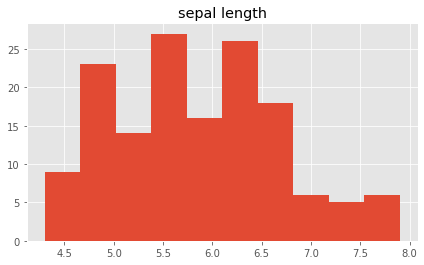

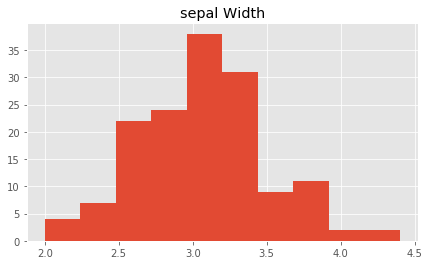

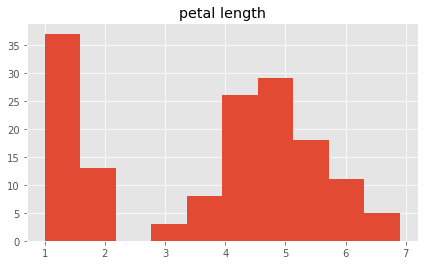

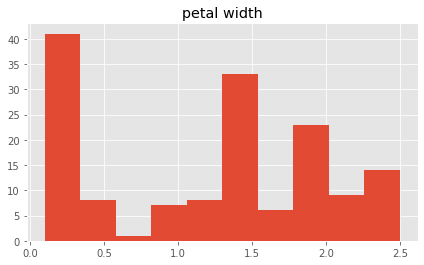

In [0]:
# Data Visiualization
for x in iris.columns.drop('species'):
  iris.hist(column=x,figsize=(7,4))

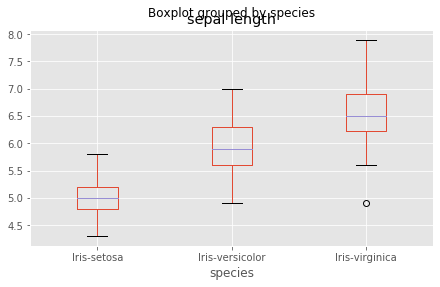

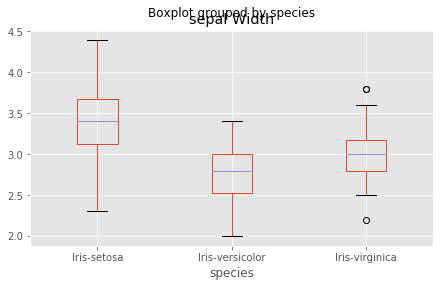

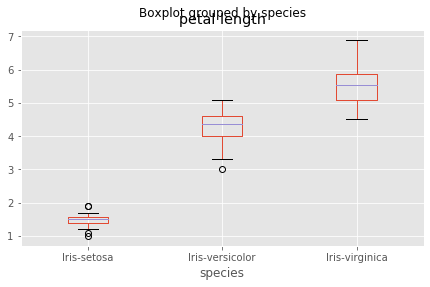

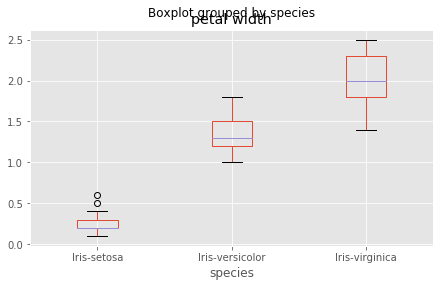

In [0]:
# Boxplot
for x in iris.columns.drop('species'):
  iris.boxplot(column=x,figsize=(7,4),by='species')

In [0]:
# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer # for standardization and Nomalization

In [0]:
X=iris.iloc[:,:4]

In [0]:
Y=iris['species']

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=4)

In [0]:
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train) # Standardization
X_test=scaler.transform(X_test)


In [0]:
# Model fitting
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree=DecisionTreeClassifier()

In [0]:
fit=tree.fit(X_train,Y_train)

<Figure size 2160x2160 with 0 Axes>

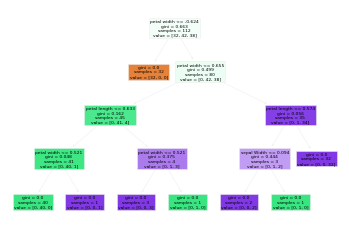

<Figure size 2160x2160 with 0 Axes>

In [0]:
# Visiualization of the model
from sklearn.tree import plot_tree
from matplotlib import pyplot
from matplotlib.pyplot import figure
plot_tree(fit,feature_names=X.columns,filled=True)
figure(figsize=(30,30),num=3)

In [0]:
# After having fitted the model, we can predict labels
y_pred=tree.predict(X_test)

In [0]:
# test the accuarcy of the prediction
from sklearn.metrics import accuracy_score

In [0]:
round(accuracy_score(Y_test,y_pred),4)

0.9737

In [0]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(Y_test,y_pred))

,0,1,2
0,18,0,0
1,0,7,1
2,0,0,12
